# Wales Greenhouse Gas Emissions Analysis

This notebook analyses historical greenhouse gas emissions data for Wales, visualising trends over time and estimating future emissions. The goal is to explore how Wales is progressing towards its net zero targets by 2050.

## Overview
The analysis includes:
- Cleaning and preprocessing emissions data
- Calculating annual changes and rates of change
- Projecting future emissions using linear and cubic models
- Estimating the year Wales could reach net zero emissions

## Aims
1. Understand historical emissions patterns in Wales.
2. Assess the impact of past trends on future targets.
3. Apply regression models to predict future emissions.
---

# Preparing the Environment

 Import the required libraries and read in the data set.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load data
GHG = pd.read_csv("UK_local_authority_emissions.csv")

---
# Data Exploration

Preview the data using .head() and .tail() functions to understand how we can filter the data for Wales only

In [88]:
# Preview the data
GHG.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),Emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.690511,1.690511,90.457,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.053500,0.000000,90.457,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006820,0.000000,90.457,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.264576,0.264576,90.457,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.008360,0.000000,90.457,98.3466


In [89]:
GHG.tail()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),Emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
559210,Wales,W92000004,Wales,W92000004,Wales,Merthyr Tydfil,W06000024,2023,Transport,Transport 'Other',N2O,0.007660,0.0000,58.593,111.9569
559211,Wales,W92000004,Wales,W92000004,Wales,Merthyr Tydfil,W06000024,2023,Waste,Landfill,CH4,6.562960,0.0000,58.593,111.9569
559212,Wales,W92000004,Wales,W92000004,Wales,Merthyr Tydfil,W06000024,2023,Waste,Waste 'Other',CO2,0.028900,0.0289,58.593,111.9569
559213,Wales,W92000004,Wales,W92000004,Wales,Merthyr Tydfil,W06000024,2023,Waste,Waste 'Other',CH4,2.554531,0.0000,58.593,111.9569
559214,Wales,W92000004,Wales,W92000004,Wales,Merthyr Tydfil,W06000024,2023,Waste,Waste 'Other',N2O,0.871529,0.0000,58.593,111.9569


The data has a column titled 'Country' which can be used to separate the emissions data for Wales only

In [90]:
# Check dataset info
GHG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559215 entries, 0 to 559214
Data columns (total 15 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   Country                                                  559215 non-null  object 
 1   Country Code                                             558782 non-null  object 
 2   Region                                                   559215 non-null  object 
 3   Region Code                                              558782 non-null  object 
 4   Second Tier Authority                                    558782 non-null  object 
 5   Local Authority                                          559215 non-null  object 
 6   Local Authority Code                                     559215 non-null  object 
 7   Calendar Year                                            559215 non-null  int64  
 8   LA GHG Sector 

dataset is 559215 rows with 15 columns, data types are all correct

---
# Filtering the Data

Separate the rows with emissions from Wales into a new dataset

In [91]:
# select only rows where 'Country' is 'Wales'
wales_GHG = GHG[GHG["Country"] == "Wales"]

wales_GHG.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),Emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
524976,Wales,W92000004,Wales,W92000004,Wales,Isle of Anglesey,W06000001,2005,Agriculture,Agriculture Electricity,CO2,14.798621,14.798621,69.095,749.4385
524977,Wales,W92000004,Wales,W92000004,Wales,Isle of Anglesey,W06000001,2005,Agriculture,Agriculture Electricity,CH4,0.468326,0.000000,69.095,749.4385
524978,Wales,W92000004,Wales,W92000004,Wales,Isle of Anglesey,W06000001,2005,Agriculture,Agriculture Electricity,N2O,0.059700,0.000000,69.095,749.4385
524979,Wales,W92000004,Wales,W92000004,Wales,Isle of Anglesey,W06000001,2005,Agriculture,Agriculture Gas,CO2,0.375010,0.375010,69.095,749.4385
524980,Wales,W92000004,Wales,W92000004,Wales,Isle of Anglesey,W06000001,2005,Agriculture,Agriculture Gas,CH4,0.011843,0.000000,69.095,749.4385


---
# Data Cleaning

Before we start with the analysis, we must first clean the data

For this analysis, we will look at the more common issues such as missing and duplicate data.

In [92]:
# Count missing values per column
missing_counts = wales_GHG.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 Country                                                    0
Country Code                                               0
Region                                                     0
Region Code                                                0
Second Tier Authority                                      0
Local Authority                                            0
Local Authority Code                                       0
Calendar Year                                              0
LA GHG Sector                                              0
LA GHG Sub-sector                                          0
Greenhouse gas                                             0
Territorial emissions (kt CO2e)                            0
Emissions within the scope of influence of LAs (kt CO2)    0
Mid-year Population (thousands)                            0
Area (km2)                                                 0
dtype: int64


there are no missing values

In [93]:
# Identify duplicate rows
duplicate_rows = wales_GHG[wales_GHG.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


there are no duplicate values

---
# Exploratory Data Analysis

1. How have the total green house gas emissions changed from 2005 to 2023?

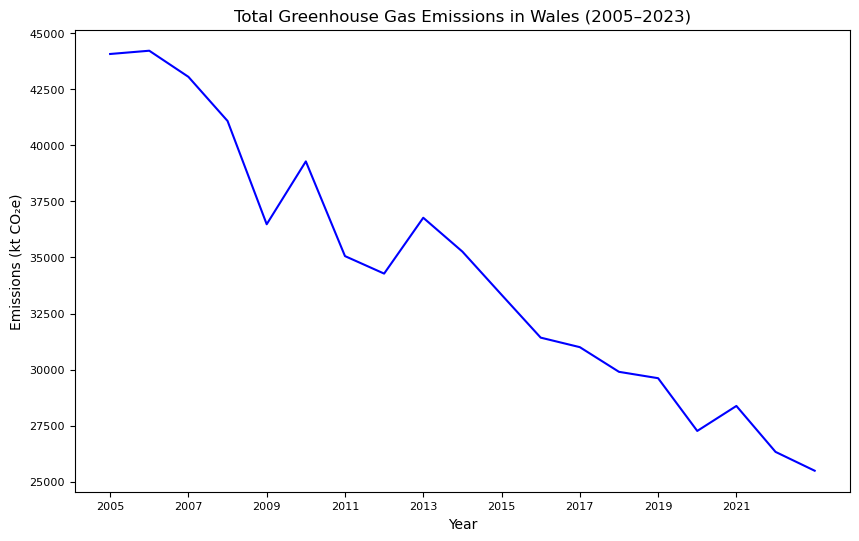

Maximum emissions: 44219.871615774 kt CO₂e in 2006
Minimum emissions: 25489.663547498 kt CO₂e in 2023
Emissions in 2005: 44074.122736484 kt CO₂e
Emissions in 2023: 25489.663547498 kt CO₂e
percentage change of emissions between 2005 to 2023: 42.16637345251576 %


In [94]:
# Group by year and sum all emissions
annual = wales_GHG.groupby("Calendar Year")["Territorial emissions (kt CO2e)"].sum()

# Plot as a line chart
plt.figure(figsize=(10,6))
plt.plot(annual.index, annual.values, 'b')

plt.title("Total Greenhouse Gas Emissions in Wales (2005–2023)")
plt.xlabel("Year")
plt.ylabel("Emissions (kt CO₂e)")

# Set x-axis ticks to every year in the dataset
plt.xticks(range(2005, 2023, 2), fontsize=8)  # smaller numbers
plt.yticks(fontsize=8)                         # smaller numbers

plt.show()

# Find the year with maximum emissions
max_year = annual.idxmax()       # returns the index (year) of the max value
max_value = annual.max()         # returns the maximum emissions value

# Find the year with minimum emissions
min_year = annual.idxmin()       # returns the index (year) of the min value
min_value = annual.min()         # returns the minimum emissions value

print(f"Maximum emissions: {max_value} kt CO₂e in {max_year}")
print(f"Minimum emissions: {min_value} kt CO₂e in {min_year}")

emissions_2005 = annual.loc[2005]
print(f"Emissions in 2005: {emissions_2005} kt CO₂e")

emissions_2023 = annual.loc[2023]
print(f"Emissions in 2023: {emissions_2023} kt CO₂e")

#precentage change 2005-2023
pct = (emissions_2023/emissions_2005)*100
pct_change = 100 - pct
print(f"percentage change of emissions between 2005 to 2023: {pct_change} %")


**Analysis of Total Emissions**

The total greenhouse gas emissions in Wales between 2005 and 2022 show an overall declining trend, decreasing from  44074 kt CO₂e in 2006 to 25489 kt CO₂e in 2023, representing a 42.17% reduction over the period. While the trend is generally downward, there are minor fluctuations, with small increases observed in 2010 and 2013 , likely due to seasonal or sector-specific variations.The data reflects a steady commitment to lowering greenhouse gas emissions, though short-term variations indicate that continued monitoring and targeted interventions remain important.


---
2. Whats the year on year rate of change of emissions in Wales?
 We will calculate the perecentage change each year using the pct_change() function

In [95]:
# Calculate year-on-year percentage change
annual_change = annual.pct_change() * 100  # multiply by 100 to get % 

Then we can apply a straight line fit using linearregression() and calculate a moving 3 year moving average using the .rolling() function to reduce the impact of any noise or anomalies in the data.

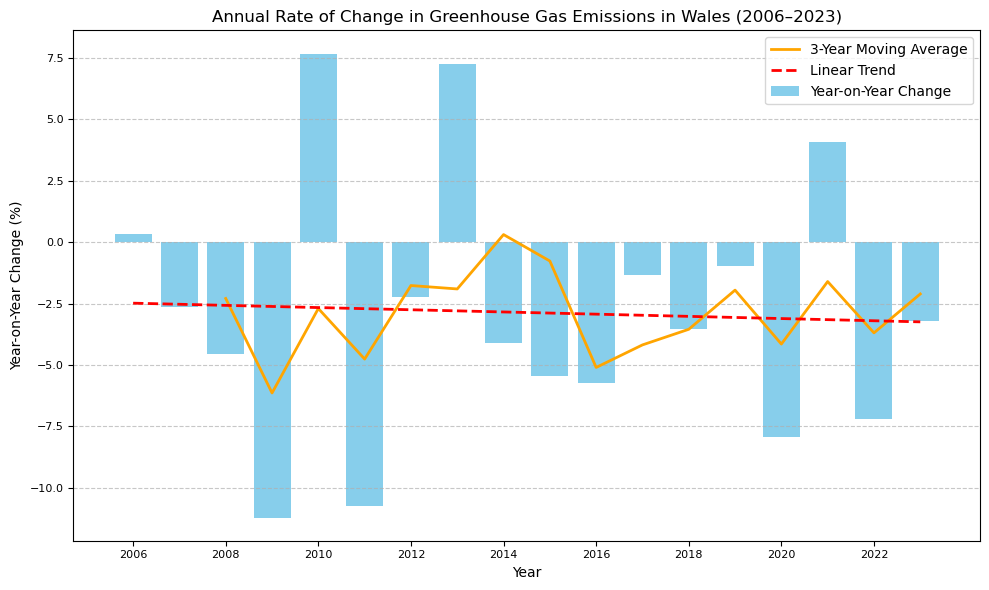

In [96]:
# Drop NaN from percentage change as no change can be calculated for 2005
annual_change_clean = annual_change.dropna()

# Prepare data for regression
X_years = annual_change_clean.index.values.reshape(-1,1)
y_change = annual_change_clean.values

# Fit linear trend
linear_trend = LinearRegression().fit(X_years, y_change)
trend_line = linear_trend.predict(X_years)

# 3-year moving average
annual_change_ma = annual_change_clean.rolling(window=3).mean()

plt.figure(figsize=(10,6))
plt.bar(annual_change_clean.index, annual_change_clean.values, color='skyblue', label='Year-on-Year Change')
plt.plot(annual_change_ma.index, annual_change_ma.values, color='orange', linestyle='-', linewidth=2, label='3-Year Moving Average')
plt.plot(annual_change_clean.index, trend_line, color='red', linestyle='--', linewidth=2, label='Linear Trend')

plt.xlabel("Year", fontsize=10)
plt.ylabel("Year-on-Year Change (%)", fontsize=10)
plt.xticks(range(2006, 2023, 2), fontsize=8)
plt.yticks(fontsize=8)
plt.title("Annual Rate of Change in Greenhouse Gas Emissions in Wales (2006–2023)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Analysis of Percentage Change Trends**

The year-on-year percentage change in greenhouse gas emissions shows considerable fluctuation, with some years experiencing larger drops than others. However, the **3-year moving average** smooths out these short-term variations and reveals a clear overall downward trend.  

Apart from one short period of increase, the moving average remains **negative**, indicating that emissions have been consistently falling across the period. The **linear trendline** reinforces this, as its negative gradient demonstrates that, on average, the rate of change is becoming increasingly negative over time.  

This suggests that Wales has made steady progress in reducing emissions, with only brief interruptions to the overall downward trajectory.

---

# Predictive Modelling 

We will use the line of best fit on the percentage change data to predict future emissions in Wales

Practical net zero year (emissions < 1 kt CO₂e): beyond 2050


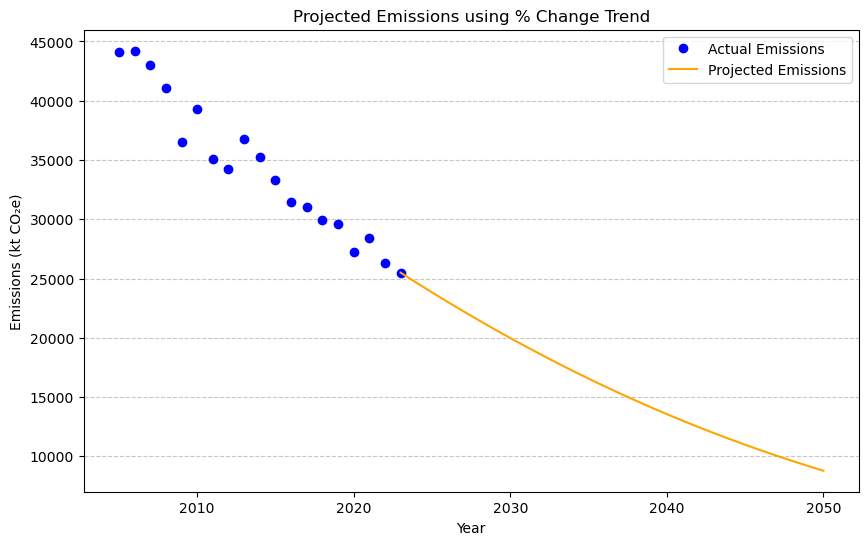

In [97]:
# Project future emissions
last_emission = annual.values[-1]  # real last actual emission
years_future = np.arange(annual.index[-1]+1, 2051)
emissions_proj = [last_emission]

for year in years_future:
    pct_change = linear_trend_model.predict(np.array([[year]]))[0]
    next_emission = emissions_proj[-1] * (1 + pct_change/100)
    emissions_proj.append(next_emission)

emissions_proj = np.array(emissions_proj)

# Find practical net zero year (emissions < threshold)
threshold = 1  # kt CO₂e
net_zero_idx = np.argmax(emissions_proj < threshold)
practical_net_zero_year = years_future[net_zero_idx] if emissions_proj[net_zero_idx] < threshold else "beyond 2050"

print("Practical net zero year (emissions < {} kt CO₂e):".format(threshold), practical_net_zero_year)

# Plot actual and projected emissions
plt.figure(figsize=(10,6))
plt.plot(annual.index, annual.values, 'o', label='Actual Emissions', color='blue')
plt.plot(np.arange(annual.index[-1], 2051), emissions_proj, '-', label='Projected Emissions', color='orange')
plt.xlabel("Year")
plt.ylabel("Emissions (kt CO₂e)")
plt.title("Projected Emissions using % Change Trend")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Projected Emissions Analysis**

This graph shows the actual greenhouse gas emissions in Wales (blue points) and a projection of future emissions (orange line) based on the linear trend of annual percentage changes. The projection starts from the most recent real emission value and decreases each year according to the trend in percentage change. It shows that Wales is currently not on track to achieve Net Zero by 2050 if it were to maintain the current rate of emission reductions. It is important to note that this projection is based purely on historical emissions data and does not account for future policies, technological changes, or other interventions, so the estimated net zero year may not reflect real-world outcomes. For a more accurate prediction, each relevant policy and intervention would need to be considered and analysed, as they can significantly influence future emissions trends. 

# Summary

This project analysed greenhouse gas emissions in Wales from 2005 to 2023. It calculated the annual percentage change in emissions, applied a 3-year moving average to smooth fluctuations, and fitted a linear trend to the percentage change data. Using this trend, a model was created to project future emissions based on the most recent actual data, illustrating the potential path towards net zero. The analysis highlights that while emissions are decreasing, reaching absolute zero will take a prolonged period unless additional policies accelerate reductions.